In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
wine_cols=['class',
'Alcohol',
'Malic acid',
'Ash',
'Alcalinity of ash'  ,
'Magnesium',
'Total phenols',
'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity',
'Hue',
'OD280/OD315 of diluted wines',
'Proline']

In [3]:
wine=pd.read_csv('...wine.data'
         ,header=None, names=wine_cols)

In [4]:
x,y=wine.iloc[:,1:].values,wine.iloc[:,0].values

In [5]:
ssc=StandardScaler()
x_std=ssc.fit_transform(x)

In [6]:
# compute mean vectors
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
np.set_printoptions(precision=4)

mean_vectors=[]

for i in np.unique(y):

    mean_vectors.append(np.mean(x_std[y==i], axis=0))

mean_vectors

[array([ 0.9192, -0.2923,  0.3256, -0.738 ,  0.4632,  0.8734,  0.9569,
        -0.579 ,  0.5404,  0.2034,  0.4588,  0.7714,  1.1745]),
 array([-0.8917, -0.3624, -0.445 ,  0.2231, -0.3646, -0.0581,  0.0518,
         0.0146,  0.069 , -0.8528,  0.4336,  0.2453, -0.7241]),
 array([ 0.1892,  0.8953,  0.2579,  0.5771, -0.0301, -0.9876, -1.2528,
         0.6901, -0.7663,  1.0114, -1.2054, -1.3109, -0.3726])]

In [7]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
np.set_printoptions(precision=4)

# Covariance matrices of classes

cov_dict={}

for i in np.unique(y):

    N_i = (x_std[y==i].shape)[0]-1

    mean_err = x_std[y==i]-mean_vectors[i-1]

    cov_dict.update({ 'S_'+str(i): ((mean_err).T).dot(mean_err) / N_i })

# Within-class scater matrix

S_W = sum(list(cov_dict.values()))

# Between-class scatter matrix

gen_mean=np.mean(x_std,axis=0)

S_B=x_std.shape[0] * np.dot((mean_vectors-gen_mean).T,mean_vectors-gen_mean)

print('Within-class scatter matrix shape:','\n',S_W.shape)

print('Between-class scatter matrix shape:','\n',S_B.shape)

Within-class scatter matrix shape: 
 (13, 13)
Between-class scatter matrix shape: 
 (13, 13)


In [8]:
eig_val, eig_vec=np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

eigen_pairs = [(np.abs(eig_val[i]), eig_vec[:,i])
                for i in range(len(eig_val))]

eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)

for i in eigen_pairs:

    print(i[0]) # Sorted eigenvalues

1865.0852429899876
682.9412711560502
1.4517760141163826e-13
1.4517760141163826e-13
1.3935949732378911e-13
9.768909623579706e-14
9.430431550486551e-14
9.430431550486551e-14
6.038658775190073e-14
4.312006198695926e-14
9.688953093736437e-15
1.8206760325928507e-15
0.0


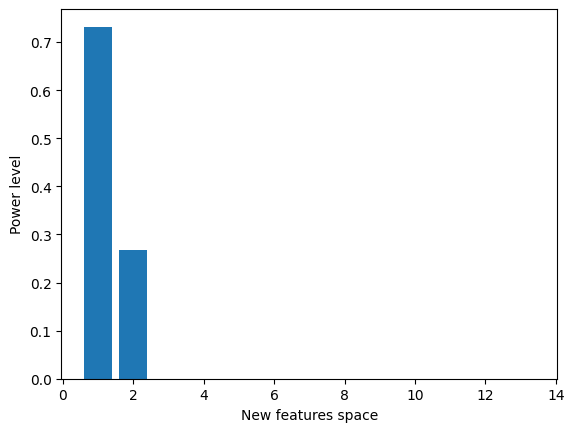

In [10]:
disc_power=[(i / eig_val.real.sum()) for i in sorted(eig_val.real, reverse=True)]

plt.bar(range(1,14),disc_power,alpha=1)

plt.xlabel('New features space')

plt.ylabel('Power level');

In [11]:
W=np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real))

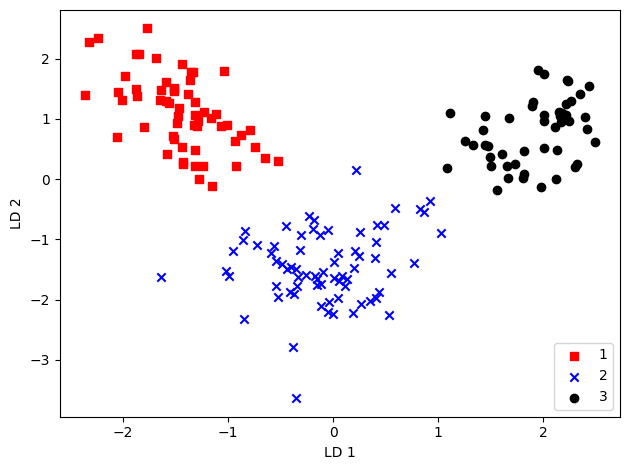

In [12]:
x_lda=x_std.dot(W)
colors = ['r', 'b', 'black']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y), colors, markers):
     plt.scatter(x_lda[y==l, 0],
                 x_lda[y==l, 1] * (-1),
                 c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()

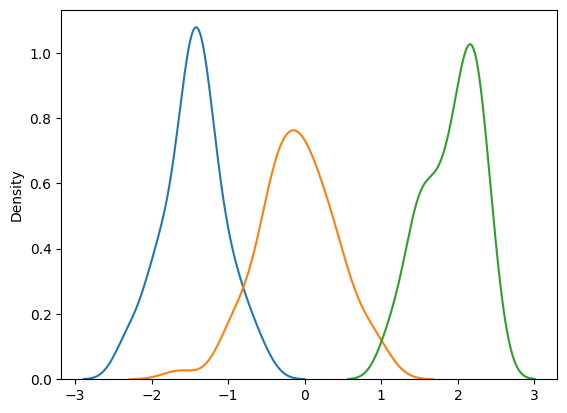

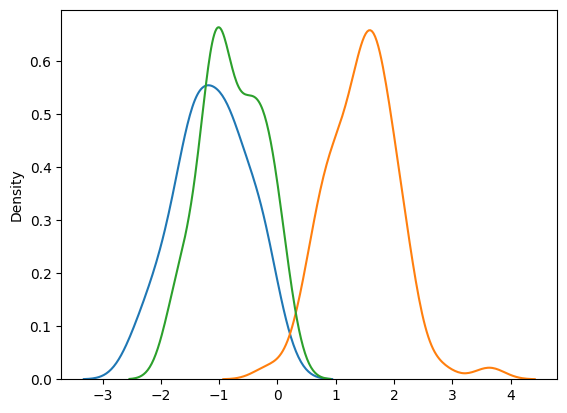

In [13]:
# density function plot showing class separatability moving to new dimension

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()

for i in np.unique(y):

    sns.kdeplot(x_std.dot(eigen_pairs[0][1])[y==i],legend=None)


fig, ax = plt.subplots()

for i in np.unique(y):

    sns.kdeplot(x_std.dot(eigen_pairs[1][1])[y==i],legend=None)